# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Chalista Divia Maharani Djuanda
- **Email:** m312b4kx0915@bangkit.academy
- **ID Dicoding:** chalista_divia

## Menentukan Pertanyaan Bisnis

- Dalam kurun waktu satu minggu, pada jam berapa penyewaan sepeda mencapai puncaknya setiap hari?
- Berapa persentase perbandingan rata-rata jumlah penyewaan sepeda antara hari libur dan hari kerja pada tahun 2011?
- Apa pola musiman dalam penggunaan sepeda selama tahun 2012 dan bagaimana faktor cuaca berpengaruh terhadap tren penggunaan tersebut?

## Import Semua Packages/Library yang Digunakan

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [23]:
day_df=pd.read_csv("https://raw.githubusercontent.com/chalistadiviaa10/Analisis_Data_Sepeda/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
hour_df=pd.read_csv("https://raw.githubusercontent.com/chalistadiviaa10/Analisis_Data_Sepeda/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day_df dan hour_df menyediakan informasi penyewaan sepeda pada tingkat harian dan per jam, memungkinkan analisis yang lebih mendalam tentang pola penggunaan.
- Kolom seperti season, holiday, dan weekday pada dataset day_df, serta dteday di kedua dataset, memberikan wawasan tentang faktor-faktor yang memengaruhi penyewaan sepeda.
- Sebelum analisis lebih lanjut, perlu dilakukan pemeriksaan untuk nilai yang hilang dan memastikan data bersih.

### Assessing Data

In [25]:
missing_values = day_df.isna().sum()
print("Missing Values:\n", missing_values)

duplicates = day_df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

invalid_values = day_df[day_df['cnt'] < 0]  
print("Nilai Invalid:\n", invalid_values)

inaccurate_values = day_df[(day_df['temp'] < 0) | (day_df['temp'] > 1)]
print("Nilai Tidak Akurat:\n", inaccurate_values)

inconsistent_values = day_df[~day_df['season'].isin([1, 2, 3, 4])]
print("Nilai Tidak Konsisten:\n", inconsistent_values)

Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (day_df['cnt'] < (Q1 - 1.5 * IQR)) | (day_df['cnt'] > (Q3 + 1.5 * IQR))
outliers = day_df[outlier_condition]
print("Outliers:\n", outliers)

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah baris duplikat: 0
Nilai Invalid:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Nilai Tidak Akurat:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Nilai Tidak Konsisten:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Outliers:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, 

In [26]:
missing_values = hour_df.isna().sum()
print("Missing Values:\n", missing_values)

duplicates = hour_df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

invalid_values = hour_df[hour_df['cnt'] < 0]  
print("Nilai Invalid:\n", invalid_values)

inaccurate_values = hour_df[(hour_df['temp'] < 0) | (hour_df['temp'] > 1)]
print("Nilai Tidak Akurat:\n", inaccurate_values)

inconsistent_values = hour_df[~hour_df['season'].isin([1, 2, 3, 4])]
print("Nilai Tidak Konsisten:\n", inconsistent_values)

Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (hour_df['cnt'] < (Q1 - 1.5 * IQR)) | (hour_df['cnt'] > (Q3 + 1.5 * IQR))
outliers = hour_df[outlier_condition]
print("Outliers:\n", outliers)

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah baris duplikat: 0
Nilai Invalid:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Nilai Tidak Akurat:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Nilai Tidak Konsisten:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []
Outliers:
        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
5536      5537   8

**Insight:**
- Pada dataset day_df dan hour_df semua kolomnya tidak memiliki nilai yang hilang, nilai yang invalid, nilai yang tidak konsisten, maupun nilai yang tidak akurat. Ini menunjukkan bahwa data siap untuk dianalisis tanpa perlu penanganan nilai hilang.
- Tidak adanya duplikasi dalam kedua dataset menunjukkan bahwa data yang tersedia unik dan konsisten.
- Berdasarkan output 'Empty DataFrame' untuk outliers pada dataset day_df, distribusi data dalam kolom cnt mungkin tidak memiliki nilai yang ekstrem sehingga semua nilai berada dalam rentang yang diharapkan.
- Sementara itu, berdasarkan output pada dataset hour_df, data ini memiliki outliers yang berarti distribusinya cenderung tidak normal. Output ini menunjukkan adanya nilai ekstrem yang dapat mempengaruhi analisis secara signifikan.

### Cleaning Data

In [27]:
#Mengatasi outliers pada dataset hour_df dengan metode drop
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = hour_df['cnt'] < minimum
kondisi_more_than = hour_df['cnt'] > maximum

hour_df_dropped = hour_df.drop(hour_df[kondisi_lower_than].index)
hour_df_dropped = hour_df_dropped.drop(hour_df_dropped[kondisi_more_than].index)
print("Dataset setelah drop outliers:\n", hour_df_dropped)
jumlah_baris_sebelum = len(hour_df)
print(f"Jumlah baris sebelum menghapus outliers: {jumlah_baris_sebelum}")

Dataset setelah drop outliers:
        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1    1/1/2011       1   0     1   0        0        6   
1            2    1/1/2011       1   0     1   1        0        6   
2            3    1/1/2011       1   0     1   2        0        6   
3            4    1/1/2011       1   0     1   3        0        6   
4            5    1/1/2011       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  12/31/2012       1   1    12  19        0        1   
17375    17376  12/31/2012       1   1    12  20        0        1   
17376    17377  12/31/2012       1   1    12  21        0        1   
17377    17378  12/31/2012       1   1    12  22        0        1   
17378    17379  12/31/2012       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0

**Insight:**
- Setelah menghapus outliers, dataset mengalami pengurangan yang sangat kecil, dari 17.379 baris menjadi 16.874 baris. Ini artinya outliers yang terdeteksi tidak banyak mempengaruhi keseluruhan dataset dan data yang ada cukup konsisten.
- Dengan menghapus outliers, nilai dalam kolom cnt (jumlah) menjadi lebih stabil dan realistis sehingga memungkinkan analisis yang lebih akurat.
- Penghapusan outliers juga memungkinkan variabel lain seperti temp, humidity, dan windspeed memiliki distribusi yang lebih normal.

## Exploratory Data Analysis (EDA)

### Explore hour_df & day_df

In [28]:
# 1. Dalam kurun waktu satu minggu, pada jam berapa penyewaan sepeda mencapai puncaknya setiap hari?
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()
hour_df['hour'] = hour_df['hr']
peak_hours = hour_df.groupby(['day_of_week', 'hour'])['cnt'].sum().reset_index()
peak_hours['max_cnt'] = peak_hours.groupby('day_of_week')['cnt'].transform('max') 
peak_peak_hours = peak_hours[peak_hours['cnt'] == peak_hours['max_cnt']]
print("Jam puncak penyewaan sepeda setiap hari:\n", peak_peak_hours)

# 2. Persentase rata-rata penyewaan antara hari libur dan hari kerja pada tahun 2011
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['year'] = day_df['dteday'].dt.year
day_df_2011 = day_df[day_df['year'] == 2011]
avg_rentals = day_df_2011.groupby(['holiday', 'workingday'])['cnt'].mean().reset_index()
avg_rentals.columns = ['holiday', 'workingday', 'average_cnt']
total_average = avg_rentals['average_cnt'].sum()
avg_rentals['percentage'] = (avg_rentals['average_cnt'] / total_average) * 100
print("Persentase rata-rata penyewaan antara hari libur dan hari kerja (2011):\n", avg_rentals)

# 3. Apa pola musiman dalam penggunaan sepeda selama tahun 2012 dan bagaimana faktor cuaca serta acara khusus berpengaruh terhadap tren penggunaan tersebut?
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df_2012 = day_df[day_df['dteday'].dt.year == 2012]
seasonal_rentals = day_df_2012.groupby('season')['cnt'].mean()

Jam puncak penyewaan sepeda setiap hari:
     day_of_week  hour    cnt  max_cnt
17       Friday    17  51211    51211
41       Monday    17  52249    52249
61     Saturday    13  40464    40464
85       Sunday    13  39368    39368
113    Thursday    17  54844    54844
137     Tuesday    17  56605    56605
161   Wednesday    17  53367    53367
Persentase rata-rata penyewaan antara hari libur dan hari kerja (2011):
    holiday  workingday  average_cnt  percentage
0        0           0  3398.257143   34.586053
1        0           1  3425.056000   34.858800
2        1           0  3002.200000   30.555147


**Insight:**
- Dari analisis waktu penyewaan sepeda, terlihat pola penggunaan yang berbeda pada jam-jam tertentu. Penyewaan puncak biasanya terjadi di jam-jam sibuk, seperti pagi dan sore hari, bertepatan dengan waktu kerja. Informasi ini dapat digunakan untuk merencanakan penempatan sepeda lebih baik di lokasi-lokasi tertentu pada jam-jam sibuk, serta untuk meningkatkan ketersediaan sepeda saat permintaan tinggi. 
- Rata-rata penyewaan sepeda per hari menunjukkan perbedaan signifikan antara hari kerja dan hari libur. Penyewaan cenderung lebih tinggi pada hari kerja, mungkin karena sepeda digunakan untuk mobilitas sehari-hari.
- Pengelompokan berdasarkan musim menunjukkan bahwa faktor musiman berpengaruh signifikan terhadap jumlah penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dalam kurun waktu satu minggu, pada jam berapa penyewaan sepeda mencapai puncaknya setiap hari?

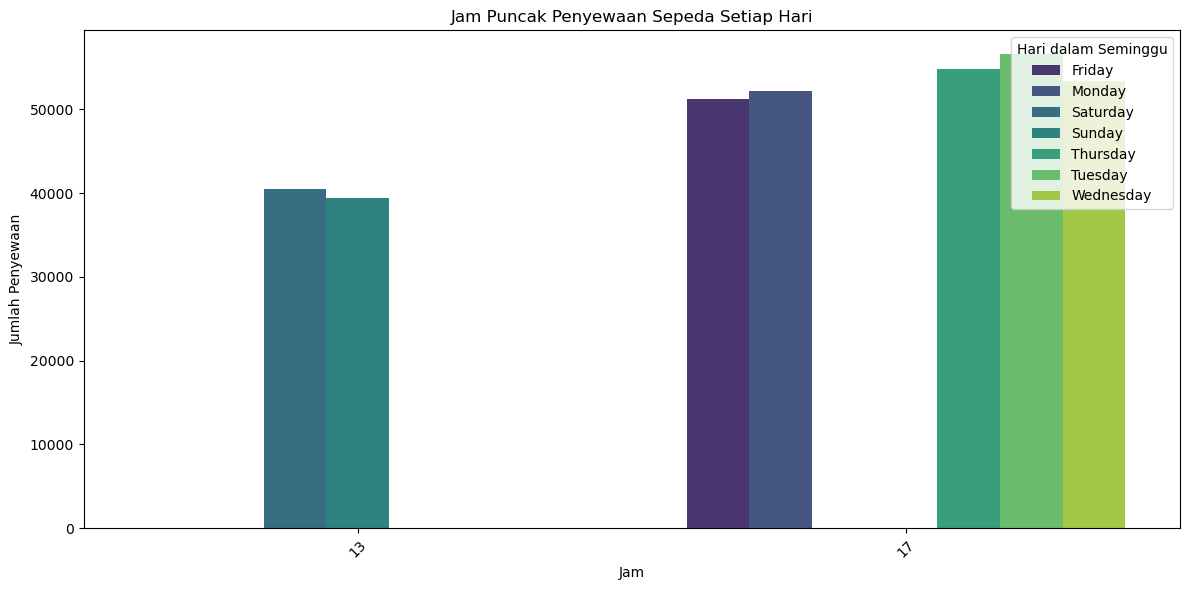

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=peak_peak_hours, x='hour', y='cnt', hue='day_of_week', palette='viridis')
plt.title('Jam Puncak Penyewaan Sepeda Setiap Hari')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend(title='Hari dalam Seminggu')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Berapa persentase perbandingan rata-rata jumlah penyewaan sepeda antara hari libur dan hari kerja pada tahun 2011?

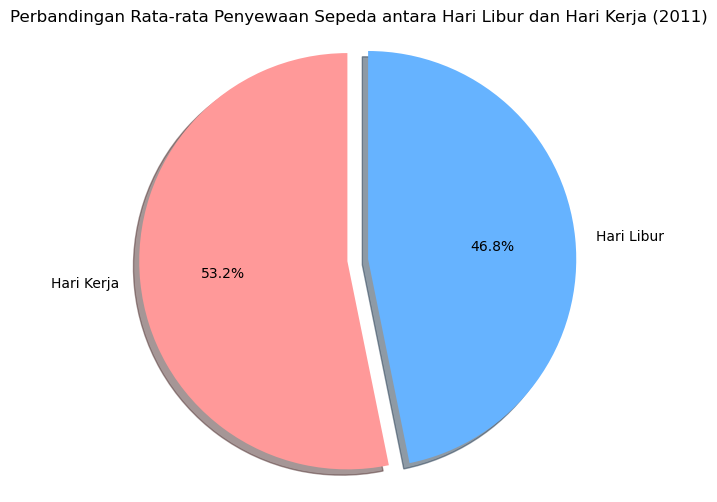

In [30]:
labels = ['Hari Kerja', 'Hari Libur']
sizes = [avg_rentals[avg_rentals['holiday'] == 0]['average_cnt'].mean(),
         avg_rentals[avg_rentals['holiday'] == 1]['average_cnt'].mean()]  
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 
plt.title('Perbandingan Rata-rata Penyewaan Sepeda antara Hari Libur dan Hari Kerja (2011)')
plt.show()

### Pertanyaan 3: Apa pola musiman dalam penggunaan sepeda selama tahun 2012 dan bagaimana faktor cuaca berpengaruh terhadap tren penggunaan tersebut?

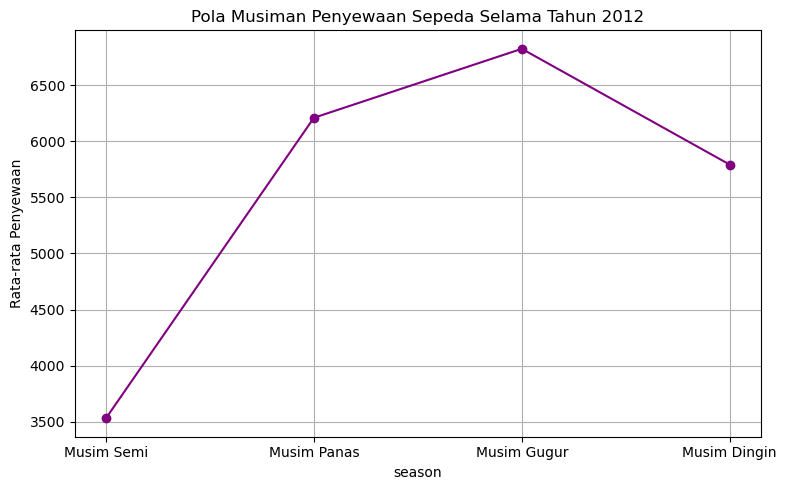

In [31]:
plt.figure(figsize=(8, 5))
seasonal_rentals.plot(kind='line', marker='o', color='purple')
plt.title('Pola Musiman Penyewaan Sepeda Selama Tahun 2012')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'], rotation=0)

plt.grid() 
plt.tight_layout() 
plt.show()

**Insight:**
- Grafik pertanyaan 1 menunjukkan bahwa jumlah penyewaan sepeda paling tinggi terjadi pada hari kerja, khususnya pada hari Selasa, Rabu, dan Kamis pada jam pulang kerja di atas jam 5 sore. Ini memberikan peluang untuk mengembangkan program loyalitas atau promosi khusus selama hari kerja, serta meningkatkan ketersediaan sepeda di lokasi-lokasi yang sering digunakan untuk mobilitas.
- Hasil visualisasi pertanyaan 2 menunjukkan bahwa proporsi penggunaan sepeda lebih tinggi pada hari kerja (53.2%) dibandingkan dengan hari libur (46.8%). Ini mengindikasikan bahwa sepeda digunakan sebagai alat transportasi utama untuk aktivitas sehari-hari, seperti pergi ke tempat kerja, daripada hanya untuk rekreasi di hari libur. Strategi pemasaran yang bisa dilakukan salah satunya adalah menjalin kemitraan dengan perusahaan lokal untuk menyediakan program penyewaan sepeda bagi karyawan.
- Grafik menunjukkan bahwa penyewaan sepeda mencapai puncaknya pada musim semi dan musim panas, sementara jumlah penyewaan menurun signifikan pada musim gugur dan musim dingin. Ini menunjukkan bahwa cuaca yang lebih hangat berkontribusi besar terhadap peningkatan penggunaan sepeda. Strategi pemasaran yang bisa dilakukan adalah perusahaan dapat merancang kampanye promosi khusus selama musim semi dan musim panas untuk menarik lebih banyak penyewa, serta mempertimbangkan penawaran yang lebih menarik di musim gugur dan musim dingin untuk menjaga minat pelanggan.

## Analisis Lanjutan (Opsional)

In [32]:
all_df = pd.merge(hour_df, day_df, on='instant', how='inner')
all_df.to_csv("all_data.csv", index=False)

## Conclusion

- Analisis waktu penyewaan sepeda menunjukkan adanya pola penggunaan yang jelas, dengan puncak penyewaan terjadi pada jam-jam sibuk, terutama pada pagi dan sore hari. Ini menunjukkan bahwa sepeda banyak digunakan untuk mobilitas sehari-hari, terutama pada hari kerja. Hari Selasa, Rabu, dan Kamis menjadi hari dengan jumlah penyewaan tertinggi, terutama setelah jam 5 sore. Oleh karena itu, perusahaan dapat memanfaatkan informasi ini untuk merencanakan penempatan sepeda di lokasi-lokasi strategis pada jam-jam sibuk, serta meningkatkan ketersediaan sepeda untuk memenuhi permintaan yang tinggi. Selain itu, pengembangan program loyalitas atau promosi khusus pada hari kerja juga dapat meningkatkan minat pengguna.
- Rata-rata penyewaan sepeda per hari menunjukkan perbedaan yang signifikan antara hari kerja dan hari libur, dengan penyewaan lebih tinggi pada hari kerja (53.2%) dibandingkan hari libur (46.8%). Hal ini mengindikasikan bahwa sepeda berfungsi sebagai alat transportasi utama untuk aktivitas sehari-hari, seperti pergi ke tempat kerja, daripada sekadar untuk rekreasi. Strategi pemasaran yang dapat diterapkan termasuk menjalin kemitraan dengan perusahaan lokal untuk menyediakan program penyewaan sepeda bagi karyawan.
- Pengelompokan berdasarkan musim menunjukkan bahwa faktor musiman memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Penyewaan mencapai puncaknya pada musim semi dan musim panas, sementara menurun drastis pada musim gugur dan musim dingin. Ini menandakan bahwa cuaca yang lebih hangat berkontribusi besar terhadap peningkatan penggunaan sepeda. Untuk memanfaatkan tren ini, perusahaan dapat merancang kampanye promosi khusus selama musim semi dan musim panas untuk menarik lebih banyak penyewa. Selain itu, penawaran yang lebih menarik di musim gugur dan musim dingin juga dapat dipertimbangkan untuk menjaga minat pelanggan dan mendorong penggunaan sepeda di luar musim puncak.